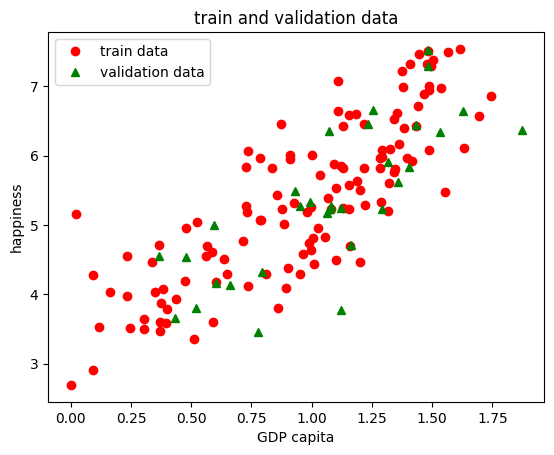

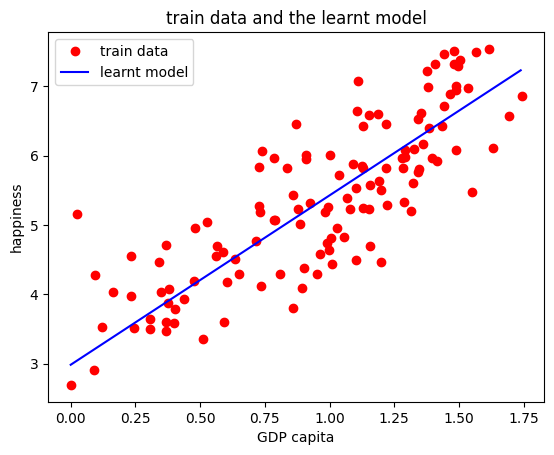

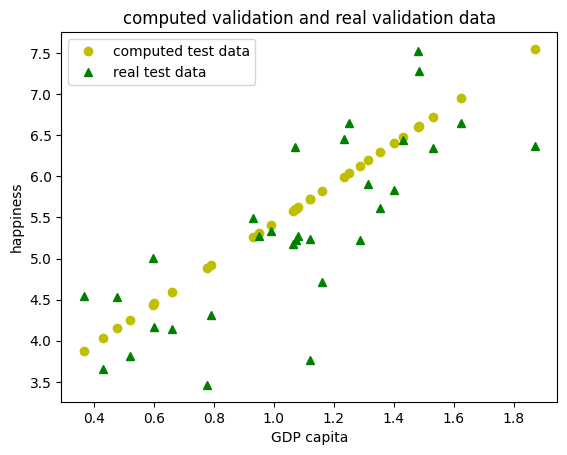

prediction error: 0.4988079807238955


In [29]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


def get_data(filename, columns):
    d = {col: [] for col in columns}
    
    with open(filename, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        
        for row in csv_reader:
            for col in columns:
                if row[col] != '':
                    d[col].append(float(row[col]))
                else: d[col].append(row[col])
        
    return d


def plot_data(inputs1, outputs1, label1, inputs2, outputs2, label2, title, color1, color2):
    if len(inputs1[0]) == 1:
        plt.plot(inputs1, outputs1, color1, label = label1)
        plt.plot(inputs2, outputs2, color2, label = label2)
        plt.title(title)
        plt.xlabel('GDP capita')
        plt.ylabel('happiness')
        plt.legend()
    else:
        inputs1a, inputs1b = list(zip(*inputs1))
        inputs2a, inputs2b = list(zip(*inputs2))
        ax = plt.axes(projection='3d')
        ax.plot(inputs1a, inputs1b, outputs1, color1, label = label1)
        ax.plot(inputs2a, inputs2b, outputs2, color2, label = label2)
        plt.title(title)
        ax.set_xlabel('GDP capita')
        ax.set_ylabel('freedom')
        ax.set_zlabel('happiness')
        
    plt.show()


def solve_with_tool(LinearRegression, file, input_cols, output_col, dropna=True, plot=True):
    cols = get_data(file, input_cols + [output_col])
    np.random.seed(5)
    
    inputs = list(zip(*[cols[x] for x in input_cols]))
    outputs = cols[output_col]

    if dropna:
        inputs2 = []
        outputs2 = []
        
        for i, x in enumerate(inputs):
            if '' not in x and outputs[i] != '':
                inputs2.append(x)
                outputs2.append(outputs[i])
        
        inputs = inputs2
        outputs = outputs2
    else:
        inputs2 = []
        outputs2 = []

        regressors = []
        for i in range(len(input_cols)):
            input_cols[i], output_col = output_col, input_cols[i]
            regressors.append(solve_with_tool(LinearRegression, file, input_cols, output_col, dropna=True, plot=False))
            input_cols[i], output_col = output_col, input_cols[i]
        
        
        for i, x in enumerate(inputs):
            if '' not in x:
                inputs2.append(x)
            else:
                space = x.index('')
                x_input = [w for w  in x]
                x_input[space] = outputs[i]
                x_input[space] = regressors[space].predict([x_input])[0]
                inputs2.append(x_input)
            outputs2.append(outputs[i])
    
        inputs = inputs2
        outputs = outputs2
    
    N = len(inputs)
    indexes = [i for i in range(N)]
    train_indexes = np.random.choice(indexes, int(N * 0.8), replace=False)
    validation_indexes = [i for i in indexes if i not in train_indexes]

    train_inputs = [inputs[i] for i in train_indexes]
    train_outputs = [outputs[i] for i in train_indexes]

    validation_inputs = [inputs[i] for i in validation_indexes]
    validation_outputs = [outputs[i] for i in validation_indexes]

    if plot:
        plot_data(train_inputs, train_outputs, 'train data', validation_inputs, validation_outputs, 'validation data', 'train and validation data', 'ro', 'g^')
   
    # learning data
    regr = LinearRegression()
    regr.fit(train_inputs, train_outputs)

    # train data
    train_inputs_unzip = list(zip(*train_inputs))

    points = 1000
    xref = []
    val = tuple(min(L) for L in train_inputs_unzip)
    step = [(max(L) - min(L)) / points for L in train_inputs_unzip]

    for i in range(1, points):
        xref.append(val)
        val = tuple(val[i] + step[i] for i in range(len(val)))
    
    yref = regr.predict(xref)
    if plot:
        plot_data(train_inputs, train_outputs, 'train data', xref, yref, 'learnt model', 'train data and the learnt model', 'ro', 'b-')
    
    # validation data
    computed_validation = regr.predict(validation_inputs)
    if plot:
        plot_data(validation_inputs, computed_validation, 'computed test data', validation_inputs, validation_outputs, 'real test data', 'computed validation and real validation data', 'yo', 'g^')
    
    error = mean_squared_error(validation_outputs, computed_validation)
    if plot:
        print(f'prediction error: {error}')

    return regr


class MyLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])
        self.weights = [0] * n_features
        self.bias = 0
        
        for i in range(self.n_iterations):
            y_pred = self.predict(X)
            dw = [0] * n_features
            db = 0
            
            for j in range(n_samples):
                for k in range(n_features):
                    dw[k] += (y_pred[j] - y[j]) * X[j][k]
                db += y_pred[j] - y[j]
                
            for k in range(n_features):
                dw[k] /= n_samples
                self.weights[k] -= self.learning_rate * dw[k]
            
            db /= n_samples
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            y_i = self.bias
            for j in range(len(X[0])):
                y_i += self.weights[j] * X[i][j]
            y_pred.append(y_i)
        return y_pred


filename = 'data/v3_world-happiness-report-2017.csv'
inputs = ['Economy..GDP.per.Capita.']
# inputs = ['Economy..GDP.per.Capita.', 'Freedom']

# solve_with_tool(linear_model.LinearRegression, filename, inputs, 'Happiness.Score', False);
solve_with_tool(MyLinearRegression, filename, inputs, 'Happiness.Score', False);


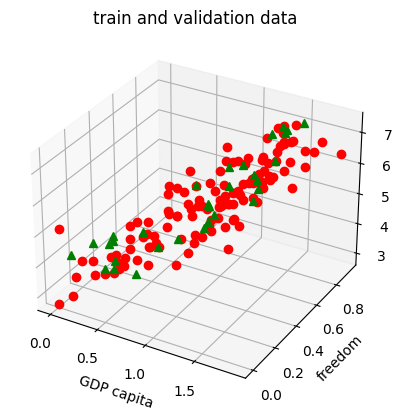

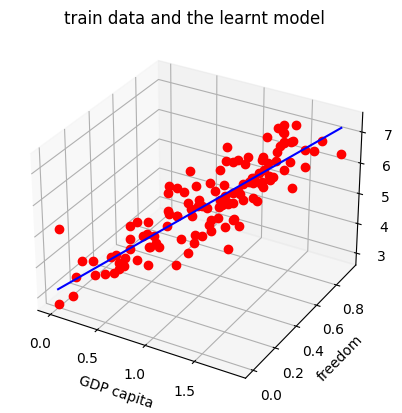

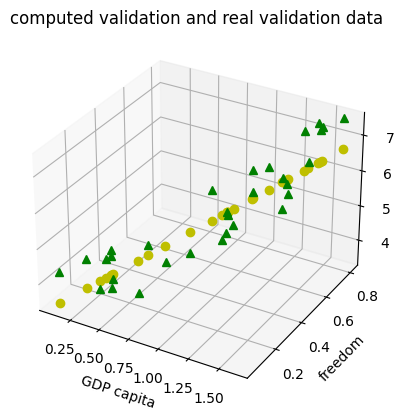

prediction error: 0.4142102429519938


In [25]:
solve_with_tool(linear_model.LinearRegression, filename, inputs, 'Happiness.Score', True);